In [ ]:
### Coding assignemnt 10: Analyze the relationship between patients' blood pressure and age. 
# Use external packages for data manipulation, regression modeling, and visualization.

### Packages & Modules for sections. 
# pip3.install.pandas 
# pip3.install.scipy
# pip3 install matplotlib

In [37]:
# Data set

data = { 
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 
    'Blood_Pressure': [120, 122, 126, 128, 130, 133, 135, 138, 142, 145, 150, 155, 160, 165, 170, 175]
}


In [43]:
### Section 1: Use the pandas package to load the dataset and perform basic data exploration, 
# such as checking for missing values and summary statistics.

import pandas as pd
# Takes the list above and transforms it into a dataframe using pd.
df = pd.DataFrame(data)

# Evalautes potential missing values in each column
print(df.isnull().sum())
print('')
# Descriptive statistics 
print(df.describe(include= 'all'))
print('')

# Skewness & Kurtosis
from scipy.stats import skew
from scipy.stats import kurtosis
print("Skewness: ", skew(df, axis = 0, bias = True))
print("kurtosis:", kurtosis(df, axis = 0, bias = True))





Age               0
Blood_Pressure    0
dtype: int64

              Age  Blood_Pressure
count   16.000000       16.000000
mean    62.500000      143.375000
std     23.804761       17.442764
min     25.000000      120.000000
25%     43.750000      129.500000
50%     62.500000      140.000000
75%     81.250000      156.250000
max    100.000000      175.000000

Skewness:  [0.         0.40745078]
kurtosis: [-1.20941176 -1.06279076]


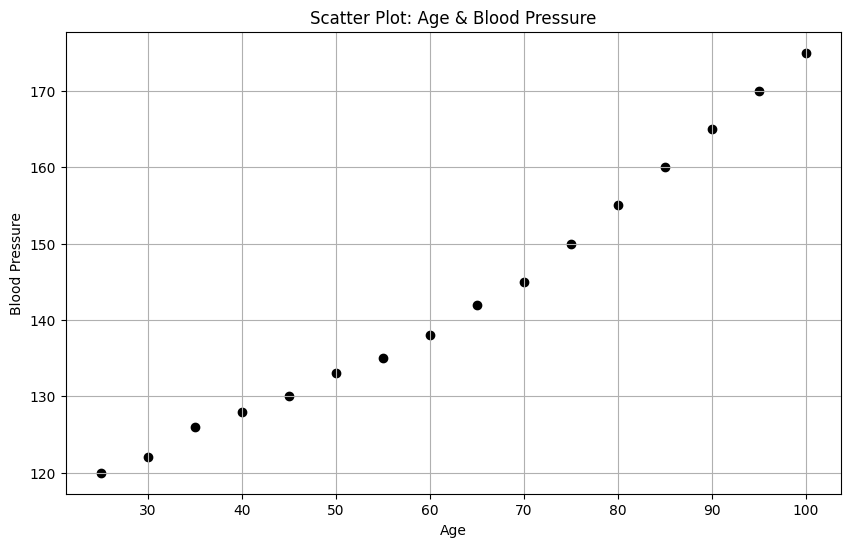

In [44]:
### Section 2: Use the matplotlib package to create a scatter plot of patients' age against their blood pressure 
# to visualize the relationship between the two variables.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Blood_Pressure'], color='black', label='Data points')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot: Age & Blood Pressure')
plt.grid(True)

In [45]:
### Section 3: Use the scikit-learn package to build a simple linear regression model to predict blood pressure based on age.
from sklearn.linear_model import LinearRegression

X = df[['Age']]  
y = df['Blood_Pressure']

# regression model
regression_model = LinearRegression()
# fitting the data to the model
regression_model.fit(X, y)
# predict y with x
y_pred = regression_model.predict(X)


Text(0.5, 1.0, 'Simple Linear Regression Model: Age & Blood Pressure')

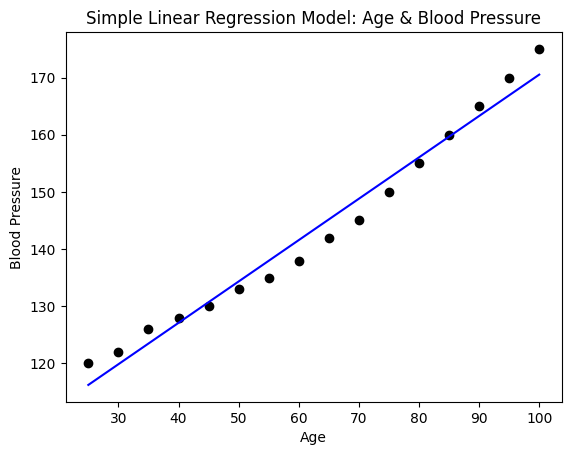

In [46]:
### Section 4: Display the regression line on the scatter plot to visualize how well the regression model fits the data.
plt.plot(df['Age'], y_pred, color='blue', label='Regression Line')
plt.scatter(df['Age'], df['Blood_Pressure'], color='black', label='Data points')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Simple Linear Regression Model: Age & Blood Pressure')

In [7]:
### Section 5: Calculate and display the regression coefficients (slope and intercept) of the linear regression model.
print('Linear regression coefficients')
print(' - Slope (Coefficient):', regression_model.coef_[0])
print(' - Intercept:', regression_model.intercept_)

Linear regression coefficients
 - Slope (Coefficient): 0.7235294117647058
 - Intercept: 98.15441176470588


In [35]:
### Section 6: Make predictions using the regression model for some example ages, 
# (e.g., 30, 40, 50, 60) and display the predicted blood pressure values.

x_new = pd.DataFrame([30, 40, 50, 60], columns=['Age'], index=[0, 1, 2, 3])
pre_BP = regression_model.predict(x_new)

x_new = pd.DataFrame(x_new)
pre_BP = pd.DataFrame(pre_BP, columns=['Blood_Pressure'], index=[0, 1, 2, 3])

frames = [x_new, pre_BP]
results = pd.concat(frames, axis = 1)

print(results)


   Age  Blood_Pressure
0   30      119.860294
1   40      127.095588
2   50      134.330882
3   60      141.566176
